In [3]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 12.0 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import yfinance as yf
df = yf.download('GOOGL', start='2010-10-10', end='2020-2-20', progress=False)
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-11,269.509521,272.572571,268.853851,269.689697,269.689697,5247347
2010-10-12,270.330322,273.268280,269.164154,270.965973,270.965973,7499693
2010-10-13,273.773773,274.019012,271.436432,271.921936,271.921936,6105089
2010-10-14,272.362366,272.897888,268.823822,270.735748,270.735748,13254932
2010-10-15,299.934937,301.121124,296.096100,301.026031,301.026031,29619950


In [5]:
Y = df['Close']
X = df.drop(['Close', 'Adj Close'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)
# print(X_train)
# print(X_test)
# print(Y_train)
# print(Y_test)

# **Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
regression = LinearRegression().fit(X_train, Y_train)

In [8]:
predicted = regression.predict(X_test)

In [9]:
print(predicted)

[1433.2560042   276.04695037 1025.73413314 1174.22493346  600.21026201
 1072.87250269  312.49112276  593.2575594  1149.12843993  564.89688836
  309.33139189  537.90769388  937.55334894  441.54549854  453.53573752
  286.15760515  766.3825834   847.3150914   796.33000984  953.96879255
  855.1544602  1024.72190825  864.39333786  305.61978274 1358.9095858
  352.80125173  788.29330025  586.04834296  765.29481301  308.29010778
 1143.68922388 1050.09850164  723.12078193  944.02702553  311.6415453
  585.93039092  315.98692876  725.01873478 1211.88862381 1041.32696714
 1256.78757007  324.9552596   508.87659167  592.16329864 1170.21491098
 1052.00913606  308.60228944 1477.58316048  552.51336098  316.16253528
  313.10662701  293.79652662 1038.4061263   545.23320697 1241.59738516
  555.59133104  426.08171392  347.87507477  766.21058136  802.18277968
 1099.64811407  367.879835    517.70152978  308.54697697  272.32921351
 1342.88342473  285.3233514   502.79337549 1111.05905871  302.90470574
  777.87

In [10]:
from sklearn.metrics import accuracy_score

print(regression.score(X_test, Y_test))

0.9998849768005834


In [11]:
import numpy as np
import pandas as pd

#from sklearn.metrics import r2_score
#r2_score(Y_test, predicted)
# Y_test = np.array(Y_test)
# err = np.count_nonzero(np.abs(Y_test - predicted))
# print(err)
frame = pd.DataFrame({"Actual" : Y_test, "Predicted" : predicted})
frame

,Actual,Predicted
Date,,
2020-01-14,1430.589966,1433.256004
2011-09-20,273.588593,276.046950
2017-12-01,1025.069946,1025.734133
2018-10-04,1177.069946,1174.224933
2015-07-16,601.780029,600.210262
...,...,...
2019-05-24,1138.609985,1142.535837
2012-11-14,326.601593,327.500959
2019-04-01,1198.979980,1197.083421


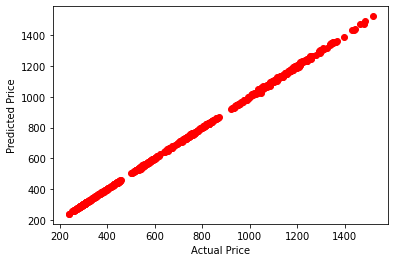

In [12]:
import matplotlib.pyplot as plt
plt.scatter(frame.Actual, frame.Predicted,  color='Red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

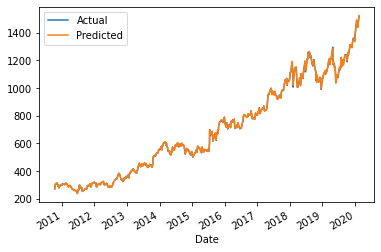

In [13]:
frame.plot()
#plt.plot(frame.Predicted, color='lightblue')
#plt.legend()

# **KNN Regression**

In [14]:
X_train.head()

,Open,High,Low,Volume
Date,,,,
2018-05-22,1089.800049,1091.800049,1072.260010,1111300
2015-12-14,751.260010,764.150024,736.260010,2693200
2016-10-12,811.960022,814.500000,808.549988,907900
2014-12-08,529.219971,533.820007,527.000000,3228300
2011-12-07,311.151154,313.143158,309.359344,4510085


In [15]:
Y_train = Y_train.to_frame()

In [16]:
Y_train

,Close
Date,
2018-05-22,1075.310059
2015-12-14,762.539978
2016-10-12,811.770020
2014-12-08,530.729980
2011-12-07,312.007019
...,...
2012-03-15,310.875885
2017-04-26,889.140015
2018-09-06,1183.989990


In [17]:
Y_test = Y_test.to_frame()

In [18]:
Y_test

,Close
Date,
2020-01-14,1430.589966
2011-09-20,273.588593
2017-12-01,1025.069946
2018-10-04,1177.069946
2015-07-16,601.780029
...,...
2019-05-24,1138.609985
2012-11-14,326.601593
2019-04-01,1198.979980


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val = []
for i in range(1,17):
  knn = KNeighborsRegressor(n_neighbors = i)

  # fit the model
  knn.fit(X_train, Y_train)

  #knn.predict(X_train)
  predicted = knn.predict(X_test)
  # print(predicted)
  # print(Y_test)

  error = sqrt(mean_squared_error(Y_test,predicted))
  print("k = " + str(i) + " | Error: " + str(error))
  rmse_val.append(error)
  # Accuracy Score
  # accuracy_train = knn.score(X_test, predicted)
  #accuracy_test = knn.score(X_test, knn.predict(X_test))

  # print ('Train_data Accuracy: %.2f' %accuracy_train)
  #print ('Test_data Accuracy: %.2f' %accuracy_test)

k = 1 | Error: 309.1168223099499
k = 2 | Error: 285.2379062629679
k = 3 | Error: 278.40340801667617
k = 4 | Error: 273.78754335301164
k = 5 | Error: 267.8094933069238
k = 6 | Error: 264.6827102682697
k = 7 | Error: 263.06267906247297
k = 8 | Error: 260.4724627454883
k = 9 | Error: 257.79851919780975
k = 10 | Error: 254.8896912762669
k = 11 | Error: 254.1677682778054
k = 12 | Error: 254.15960554404737
k = 13 | Error: 253.706647346926
k = 14 | Error: 251.9136648470583
k = 15 | Error: 250.05632677046984
k = 16 | Error: 249.82860821652272


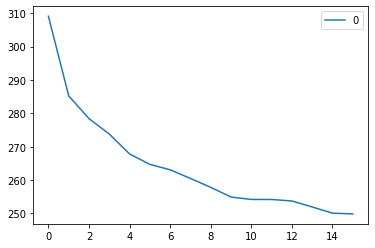

In [20]:
curve = pd.DataFrame(rmse_val)
curve.plot()

# **KNN Classification**

In [21]:
df1 = df.copy()
df1['Open-Close'] = df1.Open - df1.Close
df1['High-Low'] = df.High - df.Low
df1.dropna()
X1 = df1[['Open-Close', 'High-Low']]

In [22]:
Y1 = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [23]:
split_percentage = 0.67
split = int(split_percentage*len(df))

X1_train = X1[:split]
Y1_train = Y1[:split]

X1_test = X1[split:]
Y1_test = Y1[split:]

In [24]:
from sklearn.neighbors import KNeighborsClassifier
#for i in range(1, 17):
knn = KNeighborsClassifier(n_neighbors = 15)

# fit the model
knn.fit(X1_train, Y1_train)

# Accuracy Score
accuracy_train = accuracy_score(Y1_train, knn.predict(X1_train))
accuracy_test = accuracy_score(Y1_test, knn.predict(X1_test))

print ('k = ' + str(15) + ' | ' + 'Train_data Accuracy: %.2f' %accuracy_train)
print ('k = ' + str(15) + ' | ' + 'Test_data Accuracy: %.2f' %accuracy_test)

k = 15 | Train_data Accuracy: 0.60
k = 15 | Test_data Accuracy: 0.53


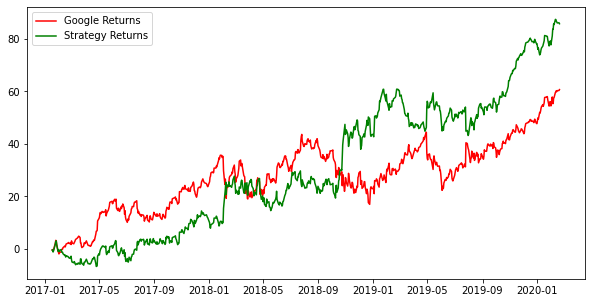

In [25]:
df1['Predicted_Signal'] = knn.predict(X1)

df1['Google_returns'] = np.log(df1['Close'] / df1['Close'].shift(1))
Cumulative_Google_returns = df1[split:]['Google_returns'].cumsum() * 100

df1['Startegy_returns'] = df1['Google_returns'] * df1['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df1[split:]['Startegy_returns'].cumsum() * 100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Google_returns, color='r',label = 'Google Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [26]:
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns - Cumulative_Google_returns) / Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.11


# **Clustering**

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [28]:
fun_df = pd.read_csv('/content/fundamentals.csv')
fun_df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [29]:
fun_df.shape

(1781, 79)

In [30]:
fun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [31]:
fun_df.describe

<bound method NDFrame.describe of       Unnamed: 0  ... Estimated Shares Outstanding
0              0  ...                 3.350000e+08
1              1  ...                 1.630222e+08
2              2  ...                 7.169154e+08
3              3  ...                 6.681299e+08
4              4  ...                 7.328355e+07
...          ...  ...                          ...
1776        1776  ...                 2.578925e+08
1777        1777  ...                 4.990099e+08
1778        1778  ...                 5.025862e+08
1779        1779  ...                 4.985294e+08
1780        1780  ...                          NaN

[1781 rows x 79 columns]>

In [32]:
fun_df.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

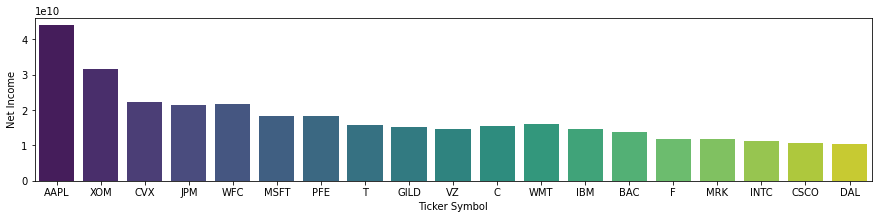

In [33]:
plt.figure(figsize = (15, 3))
dt = fun_df.sort_values(by = 'Net Income', ascending = False).head(50)

sns.barplot(x = dt['Ticker Symbol'], y = fun_df['Net Income'], palette=("viridis"), ci=None)

In [34]:
fun_df.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending'],axis = 1, inplace=True)
fun_df.dropna(axis = 1,inplace = True)
fun_df.isnull().sum().all() == 0

True

In [35]:
fun_df['Net Income'] = fun_df['Net Income'].apply(lambda x : 1 if x > 0 else 0)

In [36]:
fun_df['Net Income'].value_counts()

1    1679
0     102
Name: Net Income, dtype: int64

In [37]:
log_columns = fun_df.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

Pre-Tax ROE                                            18.004280
After Tax ROE                                          15.976369
Other Operating Activities                             15.831375
Minority Interest                                      15.767097
Equity Earnings/Loss Unconsolidated Subsidiary         14.912184
Accounts Receivable                                    14.464002
Common Stocks                                          12.146709
Short-Term Debt / Current Portion of Long-Term Debt    11.884716
Non-Recurring Items                                    11.804363
Long-Term Debt                                         11.361075
Interest Expense                                       11.275234
Other Liabilities                                      11.067952
Short-Term Investments                                 10.868986
Cash and Cash Equivalents                              10.106988
Intangible Assets                                      10.033343
Add'l income/expense item

In [38]:
for col in log_columns.index:
    fun_df[col] = np.log1p(fun_df[col])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
fun_df.dropna(axis=1,inplace=True)

In [40]:
sc = StandardScaler()
feature_columns = [x for x in fun_df.columns if x not in 'Net Income']
for col in feature_columns:
    fun_df[col] = sc.fit_transform(fun_df[[col]])

fun_df.head(4)

,Accounts Payable,After Tax ROE,Capital Expenditures,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Deferred Asset Charges,Deferred Liability Charges,Effect of Exchange Rate,Fixed Assets,Goodwill,Gross Margin,Intangible Assets,Interest Expense,Inventory,Investments,Long-Term Debt,Long-Term Investments,Net Borrowings,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Receivables,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Investing Activities,Other Liabilities,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Research and Development,Sale and Purchase of Stock,Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock
0,0.350471,0.298032,-0.213511,0.241034,0.173943,0.527154,0.421161,-0.843878,0.577944,0.236681,0.585030,-1.923990,0.441848,0.653707,0.631725,0.626449,0.159882,0.417332,-1.155124,-0.285246,0.103957,0.108165,0,0.687285,0.220235,-2.189095,0.526413,0.572833,0.970659,-0.772810,0.130671,0.753169,-0.309911,0.306609,-0.265324,-0.591424,0.278553,0.681347,1.481288,0.257346,0.516882,0.602079,0.605429,0.010768,0.844206,0.254827
1,0.483371,1.386372,-0.625041,0.509660,0.173943,-0.110775,0.429991,-0.843878,0.727496,0.236681,0.676193,0.594736,0.481169,0.757539,0.675979,0.684640,-0.026745,0.538162,-1.155124,0.314396,0.470433,-0.103430,0,0.620815,0.285986,-0.947784,0.537275,0.683785,1.019438,-0.462277,0.278157,0.750517,-0.570529,1.203624,-0.419594,-0.591424,0.278553,0.683669,1.570064,0.696975,0.601700,0.654321,0.999837,0.697584,0.903441,0.280917
2,0.465859,2.170456,-1.362505,0.396508,0.173943,-0.044419,0.493723,-0.843878,0.714942,0.236681,0.721743,0.594875,0.638452,0.754227,0.681168,0.683810,0.347262,0.545070,-1.155124,-0.064189,0.015764,-0.018245,1,0.120980,0.311433,-0.262918,0.517111,0.619917,1.014944,-1.290037,0.315813,0.697085,-0.570529,1.861114,-0.419594,-0.591424,-0.104401,0.701923,1.544306,0.713570,0.577901,0.650702,0.941026,0.714181,1.281074,0.280917
3,0.490301,2.110724,-1.644467,0.129838,0.173943,-0.074819,0.431263,1.406958,0.692256,0.236681,0.765847,0.594875,1.031662,0.754652,0.680012,0.667990,0.177076,0.566010,-1.155124,0.434770,-0.088564,-0.271347,1,-1.082231,0.267830,0.160445,0.520906,0.596067,1.003178,-1.346706,0.162992,0.684871,-0.196906,1.227183,0.780545,-0.591424,-1.121487,0.737081,1.536807,0.798516,0.558339,0.652525,0.966018,0.799135,1.248955,0.280917


**K-Means**

In [41]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(fun_df[feature_columns])
#km.cluster_centers_
#km.labels_
fun_df['kmeans'] = km.predict(fun_df[feature_columns])
(fun_df[['Net Income','kmeans']].groupby(['kmeans']).size().to_frame().rename(columns={0:'number'}))

,number
kmeans,
0,303
1,1478


**Agglomerative Clustering**

In [42]:
for linkage in ['complete', 'ward']:
    ag = AgglomerativeClustering(n_clusters=2, linkage=linkage, compute_full_tree=True)
    ag = ag.fit(fun_df[feature_columns])
    fun_df[str('agglom_'+linkage)] = ag.fit_predict(fun_df[feature_columns])

In [43]:
(fun_df[['Net Income','agglom_ward']].groupby(['Net Income','agglom_ward']).size().to_frame().rename(columns={0:'number'}))

number
Net Income agglom_ward        
0          0                13
           1                89
1          0               323
           1              1356

In [44]:
(fun_df[['Net Income','agglom_complete']].groupby(['Net Income','agglom_complete']).size().to_frame().rename(columns={0:'number'}))

number
Net Income agglom_complete        
0          0                   102
1          0                  1671
           1                     8

In [45]:
# Comparing AgglomerativeClustering with KMeans
(fun_df[['Net Income','agglom_complete', 'agglom_ward','kmeans']].groupby(['Net Income', 'agglom_complete', 'agglom_ward', 'kmeans']).size().to_frame().rename(columns={0:'number'}))

number
Net Income agglom_complete agglom_ward kmeans        
0          0               0           0            8
                                       1            5
                           1           1           89
1          0               0           0          287
                                       1           28
                           1           1         1356
           1               0           0            8

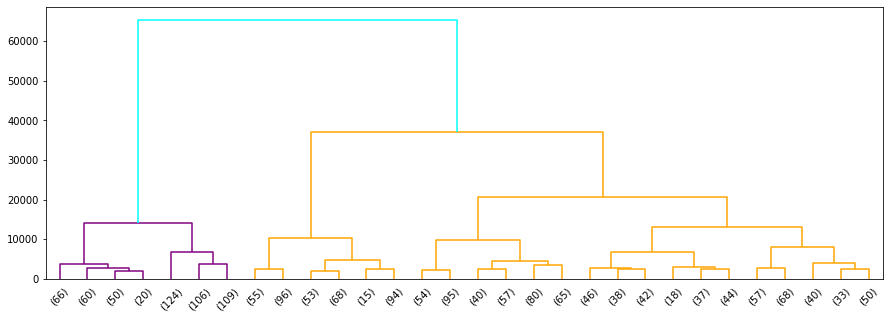

In [46]:
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['purple', 'orange'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='cyan')